# Multilevel Aggregation Analysis

---

In [1]:
import matplotlib.pyplot as plt

# font
plt.rcParams['font.sans-serif'] = ['Arial']
LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}    

# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

plt.rcParams['figure.dpi'] = 300

In [3]:
import pandas as pd
traj = pd.read_csv("./data/traj/sample_processed.csv")
traj.head()

,vehID,orderID,tripID,time[s],lon,lat,dist[km],interval[s],speed[km/h],acc[m/s2],grade[D],VSP[kW/t],braking,OpModeID
0,0.0,0.0,0.0,1.477969e+09,104.070087,30.731888,0.007380,1.0,32.384280,-3.726805,0.0,-34.847050,True,0
1,0.0,0.0,0.0,1.477969e+09,104.070087,30.731822,0.004364,1.0,20.712196,-1.527181,0.0,-11.883306,True,0
2,0.0,0.0,0.0,1.477969e+09,104.070082,30.731783,0.003779,1.0,15.737670,0.747944,0.0,1.295606,False,12
3,0.0,0.0,0.0,1.477969e+09,104.070070,30.731750,0.005502,1.0,18.587265,2.996978,0.0,16.113796,False,16
4,0.0,0.0,0.0,1.477969e+09,104.070051,30.731704,0.009463,1.0,29.423483,5.278276,0.0,47.246746,False,16


## 1 Overall aggregation

The first thing we care about is the overall characteristics of drivers, including items concerning the population size and other parameter behaviors.  
The `overallAgg()` help get the overall information for one preprocessed trajectory profile.

In [ ]:
from analysis import Aggregator

agg = Aggregator()
agg_overall = agg.overallAgg(traj)
agg_overall

,vehNum,trajCount,brakeCount,speedBinCount,accBinCount,VSPBinCount,brakeDecelBinCount,OpModeCount
0,1,2964,1166,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[16, 108, 103, 91, 77, 93, 65, 69, 59, 41, 47,...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."


Bins are defined in the `Aggregator` module.

In [4]:
from analysis import Aggregator

# bins
agg = Aggregator()
SPEED_BIN = agg.SPEED_BIN
ACC_BIN = agg.ACC_BIN
DECEL_BIN = agg.BRAKE_DECEL_BIN
VSP_BIN = agg.VSP_BIN

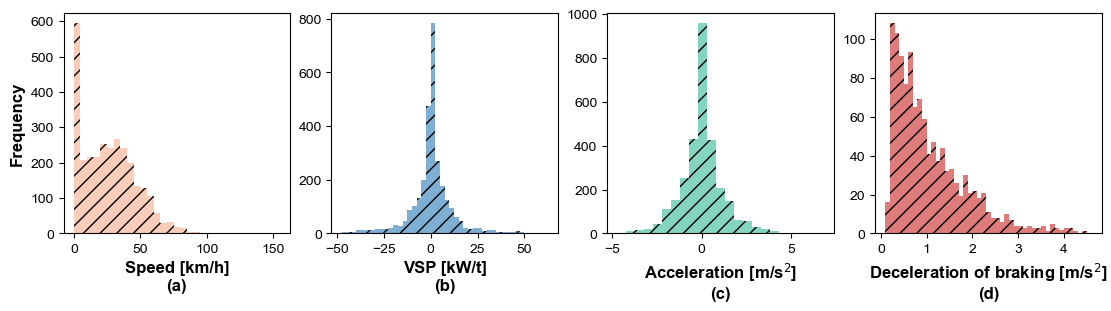

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(11,3), constrained_layout=True)

# speed
ax1.stairs(agg_overall['speedBinCount'].loc[0], SPEED_BIN, color=ORANGE, hatch='//', fill=True, alpha=0.6)
ax1.set_xlabel("Speed [km/h]\n(a)", fontdict=LABEL_FONT)
ax1.set_ylabel("Frequency", fontdict=LABEL_FONT)

# VSP
ax2.stairs(agg_overall['VSPBinCount'].loc[0], VSP_BIN, color=BLUE, hatch='//', fill=True, alpha=0.6)
ax2.set_xlabel("VSP [kW/t]\n(b)", fontdict=LABEL_FONT)

# acc
ax3.stairs(agg_overall['accBinCount'].loc[0], ACC_BIN, color=DEEPGREEN, hatch='//', fill=True, alpha=0.6)
ax3.set_xlabel("Acceleration [m/s$^2$]\n(c)", fontdict=LABEL_FONT)

# VSP
ax4.stairs(agg_overall['brakeDecelBinCount'].loc[0], DECEL_BIN, color=RED, hatch='//', fill=True, alpha=0.6)
ax4.set_xlabel("Deceleration of braking [m/s$^2$]\n(d)", fontdict=LABEL_FONT)

plt.show()

## 2 Temporal aggregation

Before the temporal aggregation, we need to encode the time item. The function `Preprocess.encodeTime()` help transfer unix time to date, hour, and weekday.

In [5]:
from preprocessing import Preprocess

pre = Preprocess()
traj = pre.encodeTime(traj)
traj.head()

,vehID,orderID,tripID,time[s],lon,lat,dist[km],interval[s],speed[km/h],acc[m/s2],grade[D],VSP[kW/t],braking,OpModeID,date,weekday,hour
0,0.0,0.0,0.0,1.477969e+09,104.070087,30.731888,0.007380,1.0,32.384280,-3.726805,0.0,-34.847050,True,0,2016/11/01,Tuesday,10
1,0.0,0.0,0.0,1.477969e+09,104.070087,30.731822,0.004364,1.0,20.712196,-1.527181,0.0,-11.883306,True,0,2016/11/01,Tuesday,10
2,0.0,0.0,0.0,1.477969e+09,104.070082,30.731783,0.003779,1.0,15.737670,0.747944,0.0,1.295606,False,12,2016/11/01,Tuesday,10
3,0.0,0.0,0.0,1.477969e+09,104.070070,30.731750,0.005502,1.0,18.587265,2.996978,0.0,16.113796,False,16,2016/11/01,Tuesday,10
4,0.0,0.0,0.0,1.477969e+09,104.070051,30.731704,0.009463,1.0,29.423483,5.278276,0.0,47.246746,False,16,2016/11/01,Tuesday,10


The function `Aggregator.refAgg()` can perform aggregation in different time spans if the column exists. For example, we can aggregate the trajectory profile into each hour. The sample file is aggregated to four hours with corresponding data items.

In [7]:
agg_hour = agg.binAgg(traj, refCol='hour')
agg_hour

Agg Pairs:   0%|          | 0/4 [00:00<?, ?it/s]

Agg Pairs: 100%|██████████| 4/4 [00:00<00:00, 16.67it/s]


,trajCount,brakeCount,brakeEventNum,mileage,speedBinCount,accBinCount,brakeDecelBinCount,VSPBinCount,OpModeCount
10,50,27,5,0.58168,"[0, 0, 0, 4, 2, 2, 2, 13, 10, 6, 3, 5, 0, 1, 1...","[0, 0, 1, 1, 1, 2, 4, 8, 7, 3, 9, 3, 3, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, ...","[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 4, ...","[18, 0, 7, 1, 5, 1, 0, 7, 3, 0, 2, 1, 0, 1, 0,..."
11,607,220,59,5.177227,"[152, 14, 16, 25, 26, 32, 42, 41, 69, 59, 45, ...","[0, 0, 1, 1, 7, 13, 24, 38, 60, 163, 154, 61, ...","[4, 16, 20, 26, 10, 20, 13, 8, 12, 7, 6, 3, 8,...","[0, 0, 3, 4, 2, 4, 2, 2, 4, 4, 6, 9, 4, 10, 23...","[91, 130, 67, 28, 22, 19, 10, 28, 59, 27, 41, ..."
14,1266,460,129,10.18722,"[262, 46, 62, 79, 106, 105, 127, 125, 82, 43, ...","[0, 1, 4, 7, 14, 33, 49, 75, 120, 316, 338, 12...","[8, 42, 46, 29, 32, 33, 26, 31, 21, 9, 22, 17,...","[5, 2, 2, 5, 5, 6, 8, 10, 6, 5, 9, 14, 12, 21,...","[195, 222, 181, 149, 101, 58, 35, 47, 67, 30, ..."
15,1041,459,118,5.585591,"[180, 148, 139, 109, 118, 103, 97, 62, 38, 27,...","[0, 4, 8, 8, 9, 18, 41, 72, 140, 224, 224, 123...","[4, 50, 36, 35, 34, 39, 25, 27, 25, 24, 17, 14...","[2, 3, 1, 3, 4, 3, 1, 2, 5, 5, 7, 6, 11, 12, 2...","[184, 72, 273, 242, 82, 40, 31, 62, 16, 6, 6, ..."


We could also aggregate it into date. Since this sample only contains data in one date, the aggregation result is the same as the overall aggregation.

In [8]:
agg_date = agg.binAgg(traj, refCol='date')
agg_date

Agg Pairs: 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]


,trajCount,brakeCount,brakeEventNum,mileage,speedBinCount,accBinCount,brakeDecelBinCount,VSPBinCount,OpModeCount
2016/11/01,2964,1166,313,21.531718,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[0, 5, 14, 17, 31, 66, 118, 193, 327, 706, 725...","[16, 108, 103, 91, 77, 93, 65, 69, 59, 41, 47,...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."


## 3 Spatial aggregation

Once the trajectories are matched to the road network, we could aggregate tracks in each edge/link with a unique `osmid`.

In [ ]:
agg_osmid = agg.refAgg(traj, refCol='osmid')
agg_osmid.head()

Agg Pairs: 100%|██████████| 66/66 [00:03<00:00, 21.17it/s]


,trajCount,brakeCount,speedBinCount,accBinCount,brakeDecelBinCount,VSPBinCount,OpModeCount
100305570.0,5,3,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
100306202.0,6,0,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
103295081.0,7,2,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
119167301.0,5,3,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
137129174.0,6,3,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."


### Aggregate for intersection

In [1]:
import pandas as pd
traj = pd.read_csv("./data/traj/sample_processed.csv")

import geopandas as gpd
nodes = gpd.read_file("./data/geo/nodes.shp")

from analysis import Aggregator

In [15]:
agg = Aggregator()
agg_node = agg.nodeAgg(traj, nodes, dist=50)

Agg nodes: 100%|██████████| 4480/4480 [00:15<00:00, 285.86it/s]


In [16]:
agg_node = agg_node.join(nodes[['osmid', 'street_cou', 'geometry']].set_index('osmid'))
agg_node = gpd.GeoDataFrame(agg_node, geometry='geometry')

<Axes: >

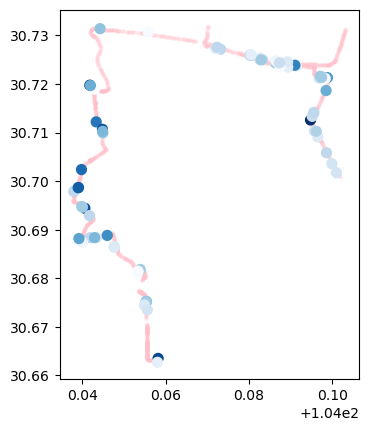

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.scatter(traj['lon'], traj['lat'], s=5, c='pink', alpha=0.1)
agg_node[agg_node['trajCount'] != 0].plot(column='trajCount', cmap='Blues', markersize=50, ax=ax)

## 4 OpMode

The OpMode aggregation is critical for generating emission rates, the function `refAgg` also works.

In [ ]:
agg_OpMode = agg.refAgg(traj, refCol='OpModeID')
agg_OpMode.head() 

Agg Pairs: 100%|██████████| 22/22 [00:01<00:00, 21.22it/s]


,trajCount,brakeCount,speedBinCount,accBinCount,brakeDecelBinCount,VSPBinCount,OpModeCount
0,488,488,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 3, 41, 47, 37, 44, 32...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
1,424,32,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[8, 20, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
11,528,477,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[7, 61, 78, 62, 59, 67, 45, 54, 44, 0, 0, 0, 0...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
12,420,11,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[1, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
13,210,0,"[594, 208, 217, 217, 252, 242, 268, 241, 199, ...","[1, 12, 16, 22, 43, 112, 154, 253, 430, 957, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7, 5, 7, 12, 12, 14, 12, 15, 16, 15, 22, 30, ...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."


## 5 Vehicle

When individual behaviors are concerned, the vehicular level aggretation is required. Different from spatio-temporal aggregation, for drivers, we care more about their parametric features such as min, max, and mean values for speed, acceleration, VSP, and so on. Therefore, we provide `vehAgg()` for vehicle aggregation. The `itemStat` columns contain 'mean', 'std', 'min', '25%', '50%', '75%', 'max' for each item.

In [ ]:
agg_veh = agg.vehAgg(traj)
agg_veh.head()

Agg Pairs: 100%|██████████| 1/1 [00:00<00:00, 42.47it/s]


,trajCount,brakeCount,speedStat,accStat,VSPStat,brakeDecelBinCount,OpModeCount
0.0,2964,1166,"[26.158602093221234, 19.89105420145002, 1.4303...","[0.02776660359327891, 1.1856863919462144, -4.3...","[0.6177922940604947, 12.117936033750969, -47.1...","[16, 108, 103, 91, 77, 93, 65, 69, 59, 41, 47,...","[488, 424, 528, 420, 210, 118, 76, 144, 145, 6..."
